Word Count: ~999 (excludes headers, code, variable lists, this section)

Project Group Request: I would prefer to work with a quieter group that tries to put in some effort.

## Research Question: 
To what extent are perceived and existing barriers to interpersonal engagement associated with social dissatisfaction and reduced participation among individuals with health conditions and disabilities, compared to those without?

#### Research Question Justification:
This research question is relevant to the scope of our STA130 Course Project because it hopes to explore:

1. Whether there is association between barriers and social engagement.
2. Whether there is association between barriers and and an individual's satisfaction with engagement.
3. Whether there is any difference in the experiences of individuals living with an illness or disability, and individuals that are not living with one.

Given that this project aims to spark interest in holistic healthcare, it is important to focus on individuals with different health conditions. 

## The Variables

For each component of the research question, here are the  variables that are relevant.


### 1. Barriers
`'psychological_barriers_score'`
`'logistical_barriers_score'`
`'health_related_barriers_score'`
`'social_and_environmental_barriers_score'`
`'financial_barriers_score'`

##### Use: 
Quantifies types of barriers experienced or perceived by individual.

##### Key Assumptions: 
- These are the only barriers faced by individuals. 
- Each barrier affects the individual in the same way, to the same degree.
- These barriers exist in isolation, and that the effects of one barrier cannot amplify another.

###### The following code shows how these variables were formed from variables in the data.

In [76]:
import pandas as pd

df = pd.read_csv('CSCS_data_anon.csv', low_memory=False)

barrier_columns = [col for col in df.columns if 'barriers' in col.lower()]

Columns containing 'barriers': ['CONNECTION_social_barriers_afraid', 'CONNECTION_social_barriers_no_invitations', 'CONNECTION_social_barriers_too_busy', 'CONNECTION_social_barriers_too_tired_a', 'CONNECTION_social_barriers_too_stressed', 'CONNECTION_social_barriers_shy', 'CONNECTION_social_barriers_nervous', 'CONNECTION_social_barriers_work_too_much', 'CONNECTION_social_barriers_family_responsibilities', 'CONNECTION_social_barriers_nothing_to_do', 'CONNECTION_social_barriers_no_people', 'CONNECTION_social_barriers_people_too_busy', 'CONNECTION_social_barriers_what_to_do', 'CONNECTION_social_barriers_small_living_space', 'CONNECTION_social_barriers_no_visitors', 'CONNECTION_social_barriers_covid', 'CONNECTION_social_barriers_alienated', 'CONNECTION_social_barriers_other_text', 'CONNECTION_social_barriers_no_troubles', 'CONNECTION_social_barriers_dont_know_where', 'CONNECTION_social_barriers_distance', 'CONNECTION_social_barriers_nothing_to_do_in_community', 'CONNECTION_social_barriers_l

In [77]:
barrier_groups = {
    "psychological_barriers": [
        'CONNECTION_social_barriers_afraid', 'CONNECTION_social_barriers_shy', 
        'CONNECTION_social_barriers_nervous', 'CONNECTION_social_barriers_social_anxiety', 
        'CONNECTION_social_barriers_anxious', 'CONNECTION_social_barriers_too_depressed', 
        'CONNECTION_social_barriers_fear_rejection', 'CONNECTION_social_barriers_fear_wont_like_me', 
        'CONNECTION_social_barriers_fear_world_view', 'CONNECTION_social_barriers_fear_unattractive', 
        'CONNECTION_social_barriers_fear_boredom', 'CONNECTION_community_barriers_social_anxiety', 
        'CONNECTION_community_barriers_too_stressed_anxious_depressed', 'CONNECTION_social_barriers_dont_enjoy_company'
    ],
    "logistical_barriers": [
        'CONNECTION_social_barriers_too_busy', 'CONNECTION_social_barriers_work_too_much', 
        'CONNECTION_social_barriers_family_responsibilities', 'CONNECTION_social_barriers_dont_know_where', 
        'CONNECTION_social_barriers_distance', 'CONNECTION_social_barriers_no_people', 
        'CONNECTION_social_barriers_no_visitors', 'CONNECTION_social_barriers_transportation', 
        'CONNECTION_community_barriers_dont_know_where', 'CONNECTION_community_barriers_cant_find', 
        'CONNECTION_community_barriers_distance', 'CONNECTION_community_barriers_hours', 
        'CONNECTION_community_barriers_services', 'CONNECTION_community_barriers_too_busy',
        'CONNECTION_social_barriers_weather'
    ],
    "health_related_barriers": [
        'CONNECTION_social_barriers_health_or_disability', 'CONNECTION_community_barriers_health_or_disability', 
        'CONNECTION_social_barriers_too_tired_a', 'CONNECTION_social_barriers_too_tired_b', 
        'CONNECTION_social_barriers_too_tired_c', 'CONNECTION_social_barriers_too_stressed'
    ],
    "social_and_environmental_barriers": [
        'CONNECTION_social_barriers_no_invitations', 'CONNECTION_social_barriers_people_too_busy', 
        'CONNECTION_social_barriers_nothing_to_do', 'CONNECTION_social_barriers_what_to_do', 
        'CONNECTION_social_barriers_small_living_space', 'CONNECTION_social_barriers_alienated', 
        'CONNECTION_social_barriers_hard_authentic', 'CONNECTION_social_barriers_not_interested', 
        'CONNECTION_community_barriers_services_not_inclusive', 'CONNECTION_community_barriers_participants_not_welcoming', 
        'CONNECTION_community_barriers_too_different', 'STRANGERS_hesitant_language_barriers',
        'CONNECTION_community_barriers_alone', 'CONNECTION_social_barriers_alone',
        'CONNECTION_social_barriers_nothing_to_do_in_community', 'CONNECTION_social_barriers_language',
        'CONNECTION_social_barriers_guests'
    ],
    "financial_barriers": [
        'CONNECTION_social_barriers_money', 'CONNECTION_community_barriers_money', 
        'CONNECTION_social_barriers_too_expensive',  'CONNECTION_social_barriers_emberassed_house'
    ],
    "other_barriers": [
        'CONNECTION_social_barriers_covid', 'CONNECTION_community_barriers_worried_covid', 
        'CONNECTION_social_barriers_covid_others', 'ADVICE_barriers', 
        'CONNECTION_social_barriers_other', 'CONNECTION_social_barriers_other_text', 
        'CONNECTION_community_barriers_other', 'CONNECTION_community_barriers_other_text',
        'CONNECTION_community_barriers_introvert', 'CONNECTION_social_barriers_introvert'
    ]
}

# Maybe to compare with no troubles: 'CONNECTION_social_barriers_no_troubles'

In [78]:
# Mapping and Summing Psychological Barriers

import numpy as np

# Define the mapping for non-barrier responses
response_mapping = {
    'Not Selected': 0,
    'Presented but no response': np.nan  # Treat as missing or neutral
}

# Apply the mapping and convert to numeric for each variable in the psychological_barriers category
for var in barrier_groups['psychological_barriers']:
    # Replace "Not Selected" and "Presented but no response" and assign 1 to any remaining responses
    df[var] = df[var].replace(response_mapping).fillna(1)
    # Convert to numeric, forcing any remaining non-numeric values to NaN
    df[var] = pd.to_numeric(df[var], errors='coerce')

# Calculate the composite score for psychological barriers by summing across the relevant columns
df['psychological_barriers_score'] = df[barrier_groups['psychological_barriers']].sum(axis=1)

   CONNECTION_social_barriers_afraid  CONNECTION_social_barriers_shy  \
0                                1.0                             1.0   
1                                1.0                             1.0   
2                                1.0                             1.0   
3                                1.0                             1.0   
4                                1.0                             1.0   

   CONNECTION_social_barriers_nervous  \
0                                 1.0   
1                                 1.0   
2                                 1.0   
3                                 1.0   
4                                 1.0   

   CONNECTION_social_barriers_social_anxiety  \
0                                        1.0   
1                                        1.0   
2                                        1.0   
3                                        1.0   
4                                        1.0   

   CONNECTION_social_barriers_a

In [79]:
# Mapping and Summing Logistical Barriers

import numpy as np
import pandas as pd

# Define the mapping for non-barrier responses
response_mapping = {
    'Not Selected': 0,
    'Presented but no response': np.nan  # Treat as missing or neutral
}

# Apply the mapping to each variable in the logistical_barriers category
for var in barrier_groups['logistical_barriers']:
    # Replace "Not Selected" and "Presented but no response" and assign 1 to any remaining responses
    df[var] = df[var].replace(response_mapping).fillna(1)
    # Convert to numeric, ensuring all values are numbers
    df[var] = pd.to_numeric(df[var], errors='coerce')

# Calculate the composite score for logistical barriers by summing across the relevant columns
df['logistical_barriers_score'] = df[barrier_groups['logistical_barriers']].sum(axis=1)

Verification of Mapping for Logistical Barriers:
Unique values in CONNECTION_social_barriers_too_busy after mapping:
CONNECTION_social_barriers_too_busy
1.0    10416
0.0      811
NaN      204
Name: count, dtype: int64

--------------------------------------------------

Unique values in CONNECTION_social_barriers_work_too_much after mapping:
CONNECTION_social_barriers_work_too_much
1.0    10416
0.0      874
NaN      141
Name: count, dtype: int64

--------------------------------------------------

Unique values in CONNECTION_social_barriers_family_responsibilities after mapping:
CONNECTION_social_barriers_family_responsibilities
1.0    10416
0.0      840
NaN      175
Name: count, dtype: int64

--------------------------------------------------

Unique values in CONNECTION_social_barriers_dont_know_where after mapping:
CONNECTION_social_barriers_dont_know_where
1.0    10842
0.0      455
NaN      134
Name: count, dtype: int64

--------------------------------------------------

Unique va

In [80]:
# Mapping and Summing Health-Related Barriers

import numpy as np
import pandas as pd

# Define the mapping for non-barrier responses
response_mapping = {
    'Not Selected': 0,
    'Presented but no response': np.nan  # Treat as missing or neutral
}

# Apply the mapping to each variable in the health_related_barriers category
for var in barrier_groups['health_related_barriers']:
    # Replace "Not Selected" and "Presented but no response" and assign 1 to any remaining responses
    df[var] = df[var].replace(response_mapping).fillna(1)
    # Convert to numeric, ensuring all values are numbers
    df[var] = pd.to_numeric(df[var], errors='coerce')

# Calculate the composite score for health-related barriers by summing across the relevant columns
df['health_related_barriers_score'] = df[barrier_groups['health_related_barriers']].sum(axis=1)

Verification of Mapping for Health-Related Barriers:
Unique values in CONNECTION_social_barriers_health_or_disability after mapping:
CONNECTION_social_barriers_health_or_disability
1.0    10842
0.0      494
NaN       95
Name: count, dtype: int64

--------------------------------------------------

Unique values in CONNECTION_community_barriers_health_or_disability after mapping:
CONNECTION_community_barriers_health_or_disability
1.0    10861
0.0      475
NaN       95
Name: count, dtype: int64

--------------------------------------------------

Unique values in CONNECTION_social_barriers_too_tired_a after mapping:
CONNECTION_social_barriers_too_tired_a
1.0    11005
0.0      255
NaN      171
Name: count, dtype: int64

--------------------------------------------------

Unique values in CONNECTION_social_barriers_too_tired_b after mapping:
CONNECTION_social_barriers_too_tired_b
1.0    10842
0.0      440
NaN      149
Name: count, dtype: int64

---------------------------------------------

In [81]:
# Mapping and Summing Social and Environmental Barriers

import numpy as np
import pandas as pd

# Define the mapping for non-barrier responses
response_mapping = {
    'Not Selected': 0,
    'Presented but no response': np.nan  # Treat as missing or neutral
}

# Apply the mapping to each variable in the social_and_environmental_barriers category
for var in barrier_groups['social_and_environmental_barriers']:
    # Replace "Not Selected" and "Presented but no response" and assign 1 to any remaining responses
    df[var] = df[var].replace(response_mapping).fillna(1)
    # Convert to numeric, ensuring all values are numbers
    df[var] = pd.to_numeric(df[var], errors='coerce')

# Calculate the composite score for social and environmental barriers by summing across the relevant columns
df['social_and_environmental_barriers_score'] = df[barrier_groups['social_and_environmental_barriers']].sum(axis=1)

Verification of Mapping for Social and Environmental Barriers:
Unique values in CONNECTION_social_barriers_no_invitations after mapping:
CONNECTION_social_barriers_no_invitations
1.0    10416
0.0      798
NaN      217
Name: count, dtype: int64

--------------------------------------------------

Unique values in CONNECTION_social_barriers_people_too_busy after mapping:
CONNECTION_social_barriers_people_too_busy
1.0    11005
0.0      268
NaN      158
Name: count, dtype: int64

--------------------------------------------------

Unique values in CONNECTION_social_barriers_nothing_to_do after mapping:
CONNECTION_social_barriers_nothing_to_do
1.0    10416
0.0      933
NaN       82
Name: count, dtype: int64

--------------------------------------------------

Unique values in CONNECTION_social_barriers_what_to_do after mapping:
CONNECTION_social_barriers_what_to_do
1.0    11005
0.0      364
NaN       62
Name: count, dtype: int64

--------------------------------------------------

Unique va

In [82]:
# Mapping and Summing Financial Barriers

import numpy as np
import pandas as pd

# Define the mapping for non-barrier responses
response_mapping = {
    'Not Selected': 0,
    'Presented but no response': np.nan  # Treat as missing or neutral
}

# Apply the mapping to each variable in the financial_barriers category
for var in barrier_groups['financial_barriers']:
    # Replace "Not Selected" and "Presented but no response" and assign 1 to any remaining responses
    df[var] = df[var].replace(response_mapping).fillna(1)
    # Convert to numeric, ensuring all values are numbers
    df[var] = pd.to_numeric(df[var], errors='coerce')

# Calculate the composite score for financial barriers by summing across the relevant columns
df['financial_barriers_score'] = df[barrier_groups['financial_barriers']].sum(axis=1)

Verification of Mapping for Financial Barriers:
Unique values in CONNECTION_social_barriers_money after mapping:
CONNECTION_social_barriers_money
1.0    10842
0.0      470
NaN      119
Name: count, dtype: int64

--------------------------------------------------

Unique values in CONNECTION_community_barriers_money after mapping:
CONNECTION_community_barriers_money
1.0    10861
0.0      446
NaN      124
Name: count, dtype: int64

--------------------------------------------------

Unique values in CONNECTION_social_barriers_too_expensive after mapping:
CONNECTION_social_barriers_too_expensive
1.0    10842
0.0      505
NaN       84
Name: count, dtype: int64

--------------------------------------------------

Unique values in CONNECTION_social_barriers_emberassed_house after mapping:
CONNECTION_social_barriers_emberassed_house
1.0    10842
0.0      516
NaN       73
Name: count, dtype: int64

--------------------------------------------------


Composite Financial Barriers Score:
   fina

#### 2.1 Social Satisfaction 
`'Connection_Dissatisfaction_Composite'`
`'Relationship_Dissatisfaction_Composite'`
`'Social_Time_Dissatisfaction_Composite'`

##### Use: 
Quantifies dissatisfaction an individual feels towards their social life.

##### Key Assumptions: 
- These areas of dissatisfaction are the only ways a person can be dissatisfied with social life.
- Survey responses are enough to capture dissatisfaction, and that effects like recency bias did not affect the individual's response.
- By combining z-scores into composite measures, it is assumed that these variables collectively capture an individual's overall satisfaction with their social life.

##### The following code shows how these variables were formed from variables in the data.

In [83]:
# Connection Satisfied Mapping

import numpy as np

# Define the mapping for two-tailed satisfaction responses
satisfaction_mapping = {
    'Yes': 0,  # Indicates satisfaction, so set to 0
    'No, I want to have MORE friends.': 1,  # Indicates dissatisfaction
    'No, I want to have FEWER friends.': 1,  # Indicates dissatisfaction
    'No, I want to spend MORE time with others.': 1,  # Indicates dissatisfaction
    'No, I want to spend LESS time with others.': 1,  # Indicates dissatisfaction
    'Presented but no response': np.nan  # Treat as missing data
}

# Apply the mapping to create new columns without modifying original columns
df['CONNECTION_satisfied_num_friends_dissatisfaction'] = df['CONNECTION_satisfied_num_friends'].replace(satisfaction_mapping)
df['CONNECTION_time_with_others_satisfied_dissatisfaction'] = df['CONNECTION_time_with_others_satisfied'].replace(satisfaction_mapping)

In [84]:
# Relationship Satisfied Mapping

# Define the revised mapping for satisfaction levels to quantify social dissatisfaction (all positive values)
satisfaction_level_mapping_revised = {
    'Very dissatisfied': 7,
    'Extremely dissatisfied': 7,
    'Dissatisfied': 6,
    'Somewhat dissatisfied': 5,
    'Neither satisfied nor dissatisfied': 4,
    'Somewhat satisfied': 3,
    'Satisfied': 2,
    'Very satisfied': 1,
    'Extremely satisfied': 1,
    'Presented but no response': np.nan  # Treat as missing data
}

# Apply the revised mapping to create new columns without modifying original columns
df['WELLNESS_satisfied_single_dissatisfaction'] = df['WELLNESS_satisfied_single'].replace(satisfaction_level_mapping_revised)
df['WELLNESS_satisfied_relationship_dissatisfaction'] = df['WELLNESS_satisfied_relationship'].replace(satisfaction_level_mapping_revised)

In [85]:
# Social Time Satisfied Mappping

import numpy as np

# Define the mapping for time categories
time_mapping = {
    'No time': 0,
    'Less than 1 hour': 0.5,
    '1 to 4 hours': 2.5,
    '5 or more hours': 5,
    'Presented but no response': np.nan,
    np.nan: np.nan
}

# List of the preference and social time columns
preference_time_columns = [
    'CONNECTION_preference_time_family_grouped',
    'CONNECTION_preference_time_friends_grouped',
    'CONNECTION_preference_time_coworkers_classmates_grouped',
    'CONNECTION_preference_time_neighbours_grouped'
]

social_time_columns = [
    'CONNECTION_social_time_family_p7d_grouped',
    'CONNECTION_social_time_friends_p7d_grouped',
    'CONNECTION_social_time_coworkers_and_classmates_p7d_grouped',
    'CONNECTION_social_time_neighbours_p7d_grouped'
]

# Map the values for each column in preference and social time lists
for col in preference_time_columns + social_time_columns:
    df[f"{col}_numeric"] = df[col].replace(time_mapping)

# Calculate the squared differences and then take the square root for each matching pair
df['dissatisfaction_family'] = np.sqrt((df['CONNECTION_preference_time_family_grouped_numeric'] - df['CONNECTION_social_time_family_p7d_grouped_numeric']) ** 2)
df['dissatisfaction_friends'] = np.sqrt((df['CONNECTION_preference_time_friends_grouped_numeric'] - df['CONNECTION_social_time_friends_p7d_grouped_numeric']) ** 2)
df['dissatisfaction_coworkers_classmates'] = np.sqrt((df['CONNECTION_preference_time_coworkers_classmates_grouped_numeric'] - df['CONNECTION_social_time_coworkers_and_classmates_p7d_grouped_numeric']) ** 2)
df['dissatisfaction_neighbours'] = np.sqrt((df['CONNECTION_preference_time_neighbours_grouped_numeric'] - df['CONNECTION_social_time_neighbours_p7d_grouped_numeric']) ** 2)

   dissatisfaction_family  dissatisfaction_friends  \
0                     0.0                      2.5   
1                     2.5                      2.5   
2                     0.0                      0.0   
3                     NaN                      NaN   
4                     0.0                      0.0   

   dissatisfaction_coworkers_classmates  dissatisfaction_neighbours  
0                                   NaN                         0.0  
1                                   NaN                         0.0  
2                                   NaN                         0.0  
3                                   NaN                         NaN  
4                                   0.0                         0.0  


In [86]:
# Zscore Calculation of Each Variable

from scipy.stats import zscore

# Connection Dissatisfaction
df['CONNECTION_satisfied_num_friends_dissatisfaction_z'] = zscore(df['CONNECTION_satisfied_num_friends_dissatisfaction'])
df['WELLNESS_satisfied_single_dissatisfaction_z'] = zscore(df['WELLNESS_satisfied_single_dissatisfaction'])

# Relationship Dissatisfaction
df['WELLNESS_satisfied_single_dissatisfaction_z'] = zscore(df['WELLNESS_satisfied_single_dissatisfaction'])
df['WELLNESS_satisfied_relationship_dissatisfaction_z'] = zscore(df['WELLNESS_satisfied_relationship_dissatisfaction'])

# Social Time Dissatisfaction
df['dissatisfaction_family_z'] = zscore(df['dissatisfaction_family'])
df['dissatisfaction_friends_z'] = zscore(df['dissatisfaction_friends'])
df['dissatisfaction_coworkers_classmates_z'] = zscore(df['dissatisfaction_coworkers_classmates'])
df['dissatisfaction_neighbours_z'] = zscore(df['dissatisfaction_neighbours'])

In [87]:
from scipy.stats import zscore

# Standardize each variable, ignoring NaNs
for col in [
    'CONNECTION_satisfied_num_friends_dissatisfaction', 
    'WELLNESS_satisfied_single_dissatisfaction', 
    'WELLNESS_satisfied_relationship_dissatisfaction', 
    'dissatisfaction_family', 
    'dissatisfaction_friends', 
    'dissatisfaction_coworkers_classmates', 
    'dissatisfaction_neighbours'
]:
    # Calculate Z-scores, ignoring NaN values
    df[f"{col}_z"] = (df[col] - df[col].mean(skipna=True)) / df[col].std(skipna=True)

# Calculate composite scores while ignoring NaN values in each row
df['Connection_Dissatisfaction_Composite'] = df[['CONNECTION_satisfied_num_friends_dissatisfaction_z', 
                                                 'WELLNESS_satisfied_single_dissatisfaction_z']].mean(axis=1, skipna=True)

df['Relationship_Dissatisfaction_Composite'] = df[['WELLNESS_satisfied_single_dissatisfaction_z', 
                                                   'WELLNESS_satisfied_relationship_dissatisfaction_z']].mean(axis=1, skipna=True)

df['Social_Time_Dissatisfaction_Composite'] = df[['dissatisfaction_family_z', 
                                                  'dissatisfaction_friends_z', 
                                                  'dissatisfaction_coworkers_classmates_z', 
                                                  'dissatisfaction_neighbours_z']].mean(axis=1, skipna=True)

In [88]:
# Count the non-null values for each composite
non_null_counts = {
    'Connection_Dissatisfaction_Composite': df['Connection_Dissatisfaction_Composite'].notnull().sum(),
    'Relationship_Dissatisfaction_Composite': df['Relationship_Dissatisfaction_Composite'].notnull().sum(),
    'Social_Time_Dissatisfaction_Composite': df['Social_Time_Dissatisfaction_Composite'].notnull().sum()
}

# Display the non-null counts
print(non_null_counts)

{'Connection_Dissatisfaction_Composite': 3087, 'Relationship_Dissatisfaction_Composite': 1537, 'Social_Time_Dissatisfaction_Composite': 6663}


#### 2.2 Social Participation 
 `'Social_Participation_Score'`

###### Use: 
Quantifies an individual's level of participation in social activities.

###### Key Assumptions: 
- All social activities, regardless of the number of people or mode, are equal and impact the individual's well-being in the same way.
- All social activities carry the same value, regardless of impact on the individual.
- Frequency is assumed an adequate proxy for quality of social interaction.

###### The following code shows how this variable was formed from variables in the data.

In [89]:
# List of variables to exclude
excluded_columns = [
    'STRANGERS_where_group_activities', 
    'SUBSTANCE_USE_dast_10_scale_illegal_activities', 
    'PSYCH_cope_60_inventory_turn_to_activities', 
    'ADVICE_important_activities', 
    'PSYCH_cope_60_suppression_of_competing_activities_subscale_score'
]

# Find columns that contain both "activities" and "p3m" in their names, excluding the specified columns
activity_columns = [col for col in df.columns if 'activities' in col.lower() and 'p3m' in col.lower() and col not in excluded_columns]

Filtered columns with 'activities' and 'p3m' in their names (excluding specified columns): ['CONNECTION_activities_talked_day_p3m', 'CONNECTION_activities_talked_family_p3m', 'CONNECTION_activities_talked_job_p3m', 'CONNECTION_activities_talked_hobbies_p3m', 'CONNECTION_activities_phone_p3m', 'CONNECTION_activities_letter_or_email_p3m', 'CONNECTION_activities_checked_in_p3m', 'CONNECTION_activities_text_or_messaged_p3m', 'CONNECTION_activities_chat_p3m', 'CONNECTION_activities_video_chat_p3m', 'CONNECTION_activities_group_video_chat_p3m', 'CONNECTION_activities_walk_p3m', 'CONNECTION_activities_coffee_p3m', 'CONNECTION_activities_board_games_p3m', 'CONNECTION_activities_computer_games_p3m', 'CONNECTION_activities_onlinegames_p3m', 'CONNECTION_activities_visited_friends_p3m', 'CONNECTION_activities_visited_family_p3m', 'CONNECTION_activities_community_p3m', 'CONNECTION_activities_helped_p3m', 'CONNECTION_activities_meeting_work_p3m', 'CONNECTION_activities_discussion_group_p3m', 'CONNEC

In [90]:
# Mapping Social Participation Variables
quantification_mapping_intuitive = {
    'Daily or almost daily': 7,
    'A few times a week': 6,
    'Weekly': 5,
    'A few times a month': 4,
    'Monthly': 3,
    'Less than monthly': 2,
    'Not in the past three months': 1
}

# Apply the mapping to each variable in activity_columns
for var in activity_columns:
    df[f"{var}_quantified"] = df[var].map(quantification_mapping_intuitive)

/tmp/ipykernel_53/2200237556.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{var}_quantified"] = df[var].map(quantification_mapping_intuitive)
/tmp/ipykernel_53/2200237556.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{var}_quantified"] = df[var].map(quantification_mapping_intuitive)
/tmp/ipykernel_53/2200237556.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using 

In [91]:
# Standardizing Social Participation with Zscore
from scipy.stats import zscore

# Automatically select all columns that end with '_quantified'
participation_columns = [col for col in df.columns if col.endswith('_quantified')]

# Calculate the z-scores for each quantified column
for col in participation_columns:
    df[f"{col}_z"] = zscore(df[col].fillna(0))  # Fill NaNs with 0 temporarily for z-score calculation


/tmp/ipykernel_53/1950886180.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_z"] = zscore(df[col].fillna(0))  # Fill NaNs with 0 temporarily for z-score calculation
/tmp/ipykernel_53/1950886180.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_z"] = zscore(df[col].fillna(0))  # Fill NaNs with 0 temporarily for z-score calculation
/tmp/ipykernel_53/1950886180.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfor

In [92]:
# Composite Social Participation Score

# Select all z-score columns
zscore_columns = [f"{col}_z" for col in participation_columns]

# Calculate the mean to get the composite social participation score
df['Social_Participation_Score'] = df[zscore_columns].mean(axis=1, skipna=True)


   Social_Participation_Score
0                   -0.750183
1                   -0.750183
2                   -0.750183
3                    0.686391
4                    1.550966


/tmp/ipykernel_53/3653355125.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Social_Participation_Score'] = df[zscore_columns].mean(axis=1, skipna=True)


#### 3. Health Conditions and Disabilities
 `'health_condition_or_disability'`

###### Use: 
True value if an individual has a health condition or disability. False value if an individual doesn't.

###### Key Assumptions: 
- All health conditions and disabilities are equal and affect the individual in the same way.
- The past health status of the individual does not affect them, and only the current one does.
- An individual needs to be diagnosed or receive treatment to be considered positive for a health condition.

###### The following code shows how this variable was formed from variables in the data.

In [93]:
# Define the columns to check for 'Yes' or 'Yes, currently' in their values
diagnosis_treatment_columns = [col for col in df.columns if 'diagnosis' in col.lower() or 'treatment' in col.lower()]
additional_columns = ['DEMO_identity_disability', 'DEMO_identity_mental_health']
columns_to_check = diagnosis_treatment_columns + additional_columns

# Create a new column 'health_condition_or_disability' that is True if any specified column contains 'Yes' or 'Yes, currently', otherwise False
df['health_condition_or_disability'] = df[columns_to_check].apply(lambda row: row.astype(str).str.contains('Yes|Yes, currently', case=False, na=False).any(), axis=1)

0    False
1    False
2    False
3     True
4    False
Name: health_condition_or_disability, dtype: bool


/tmp/ipykernel_53/96828872.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['health_condition_or_disability'] = df[columns_to_check].apply(lambda row: row.astype(str).str.contains('Yes|Yes, currently', case=False, na=False).any(), axis=1)


## Initial Variable Visualizations

Now that all variables have been identified...

**Barriers**:
`'psychological_barriers_score'`
`'logistical_barriers_score'`
`'health_related_barriers_score'`
`'social_and_environmental_barriers_score'`
`'financial_barriers_score'`

**Social Dissatisfaction**:
`'Connection_Dissatisfaction_Composite'`
`'Relationship_Dissatisfaction_Composite'`
`'Social_Time_Dissatisfaction_Composite'`


**Social Participation**:
 `'Social_Participation_Score'`

**Health Status**:
`'health_condition_or_disability'`

...initial visualizations can be generated.

###### All Variables: Distribution of Scores by Health Status

Visualization: Histograms.

Reasoning: Some of the variables do not have much variability between summary statistics, so histograms may be better than boxplots to show the distributions. Side-by-side comparisons of the distributions of persons with health conditions and those without may make valuable insights more visible.

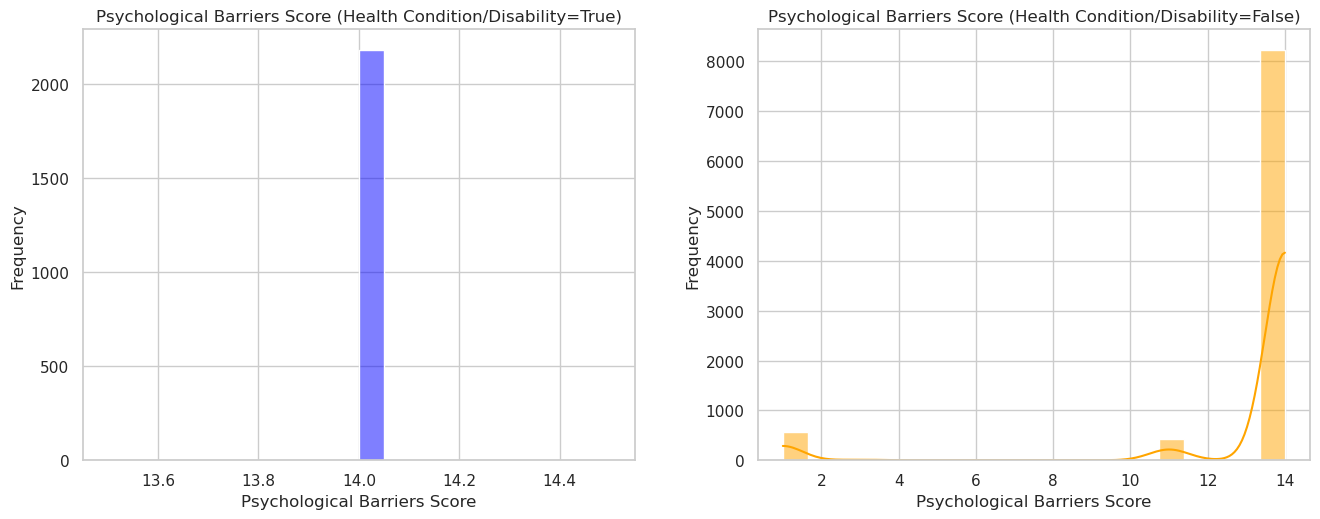

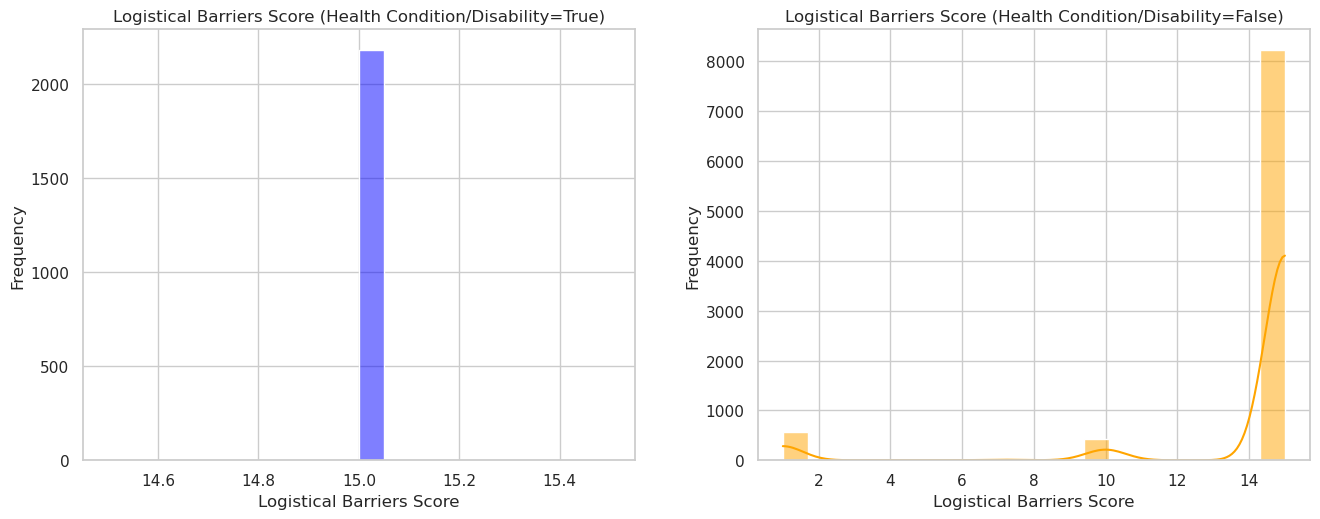

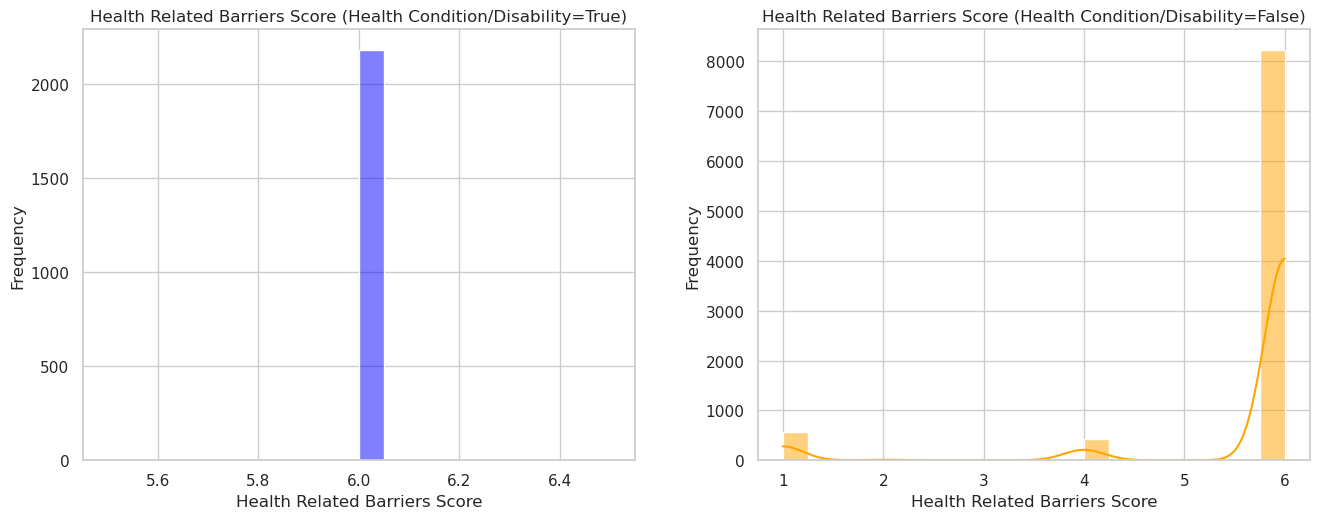

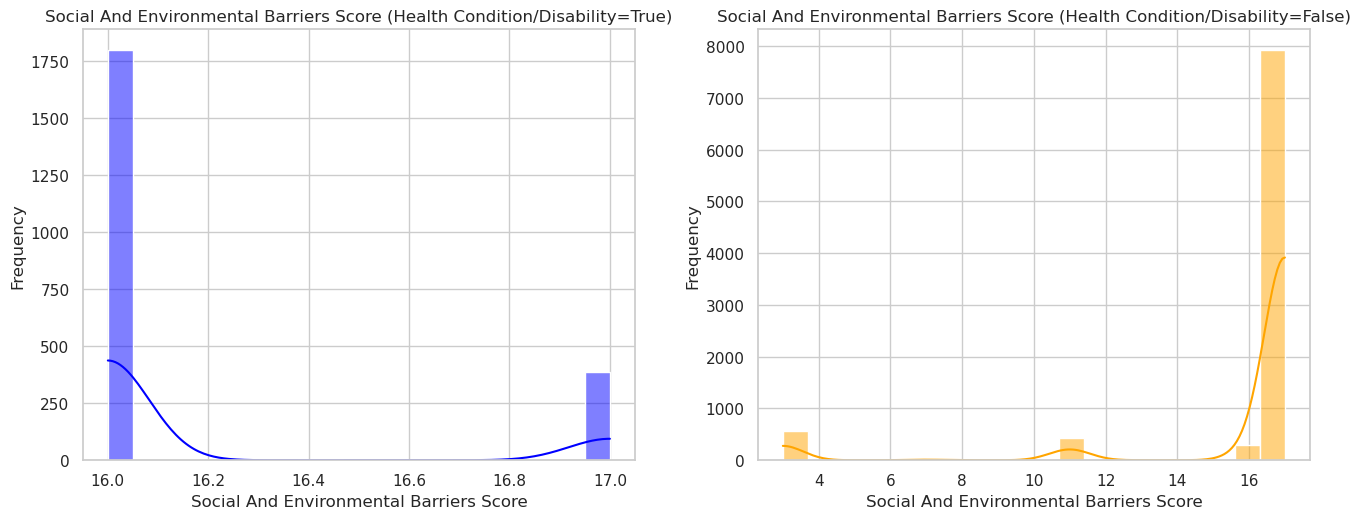

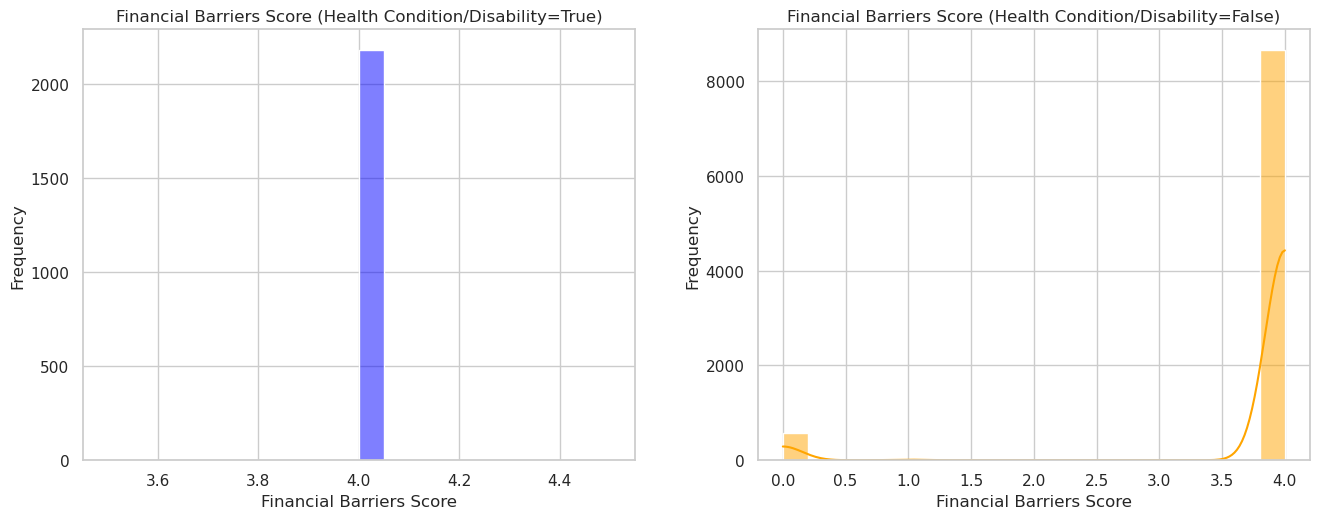

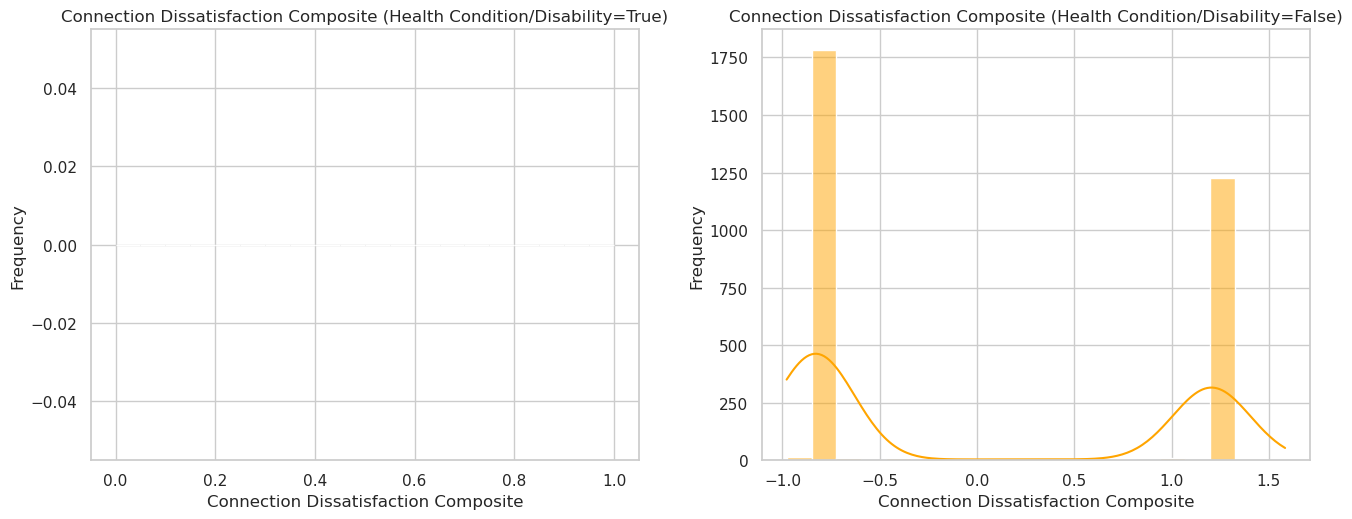

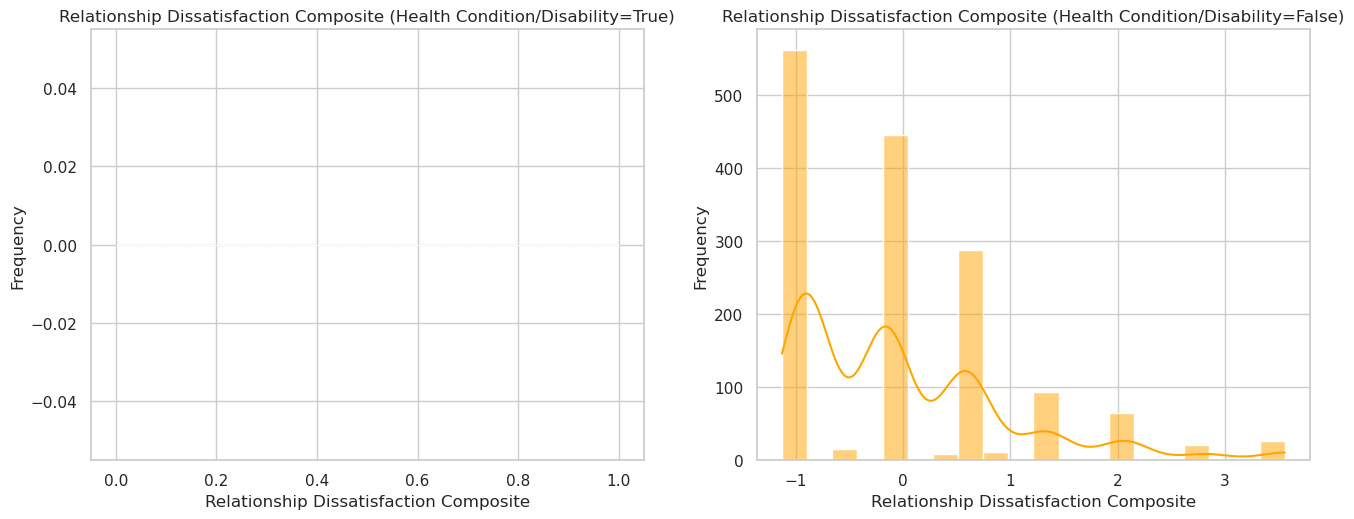

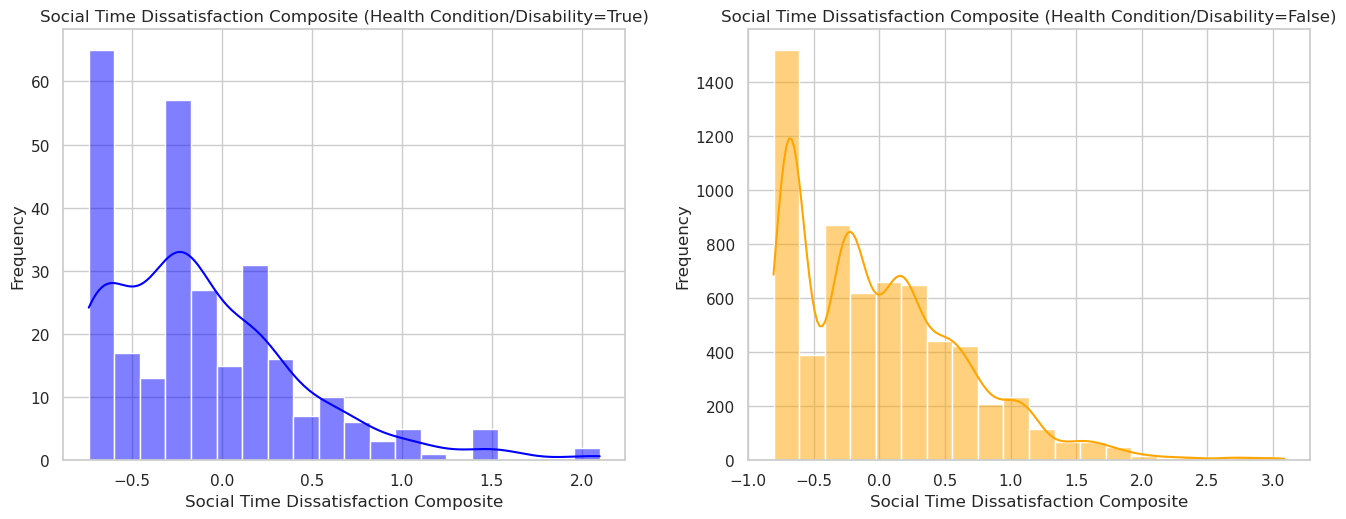

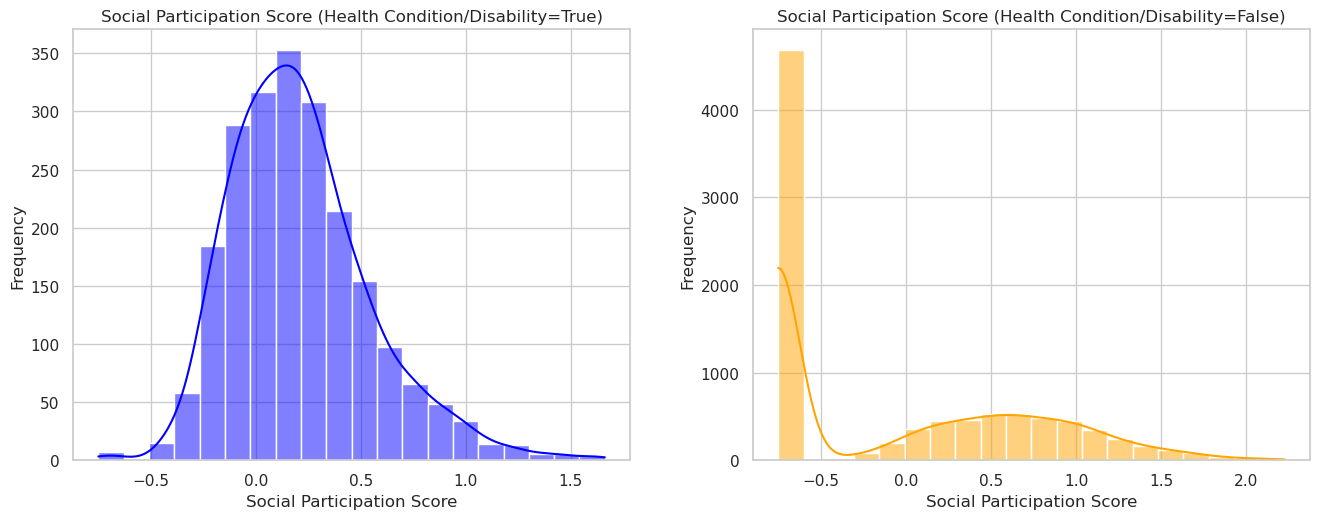

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables to compare
variables_to_compare = [
    'psychological_barriers_score', 'logistical_barriers_score', 
    'health_related_barriers_score', 'social_and_environmental_barriers_score', 
    'financial_barriers_score', 'Connection_Dissatisfaction_Composite', 
    'Relationship_Dissatisfaction_Composite', 'Social_Time_Dissatisfaction_Composite', 
    'Social_Participation_Score'
]

# Filter out variables that might be missing in df
variables_to_compare = [var for var in variables_to_compare if var in df.columns]

# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create side-by-side histograms for each variable
for var in variables_to_compare:
    plt.figure(figsize=(14, 6))

    # Histogram for health_condition_or_disability=True
    plt.subplot(1, 2, 1)
    sns.histplot(data=df[df['health_condition_or_disability'] == True], x=var, kde=True, bins=20, color="blue")
    plt.title(f"{var.replace('_', ' ').title()} (Health Condition/Disability=True)")
    plt.xlabel(var.replace('_', ' ').title())
    plt.ylabel("Frequency")

    # Histogram for health_condition_or_disability=False
    plt.subplot(1, 2, 2)
    sns.histplot(data=df[df['health_condition_or_disability'] == False], x=var, kde=True, bins=20, color="orange")
    plt.title(f"{var.replace('_', ' ').title()} (Health Condition/Disability=False)")
    plt.xlabel(var.replace('_', ' ').title())
    plt.ylabel("Frequency")

    # Adjust layout
    plt.tight_layout(pad=3)
    plt.show()


###### All Variables: Distribution of Scores by Health Status

Visualization: Strip Plot.

Reasoning: Strip plots are straightforward, providing a quick view of the data. This makes it easier to visually interpret the variation between groups.

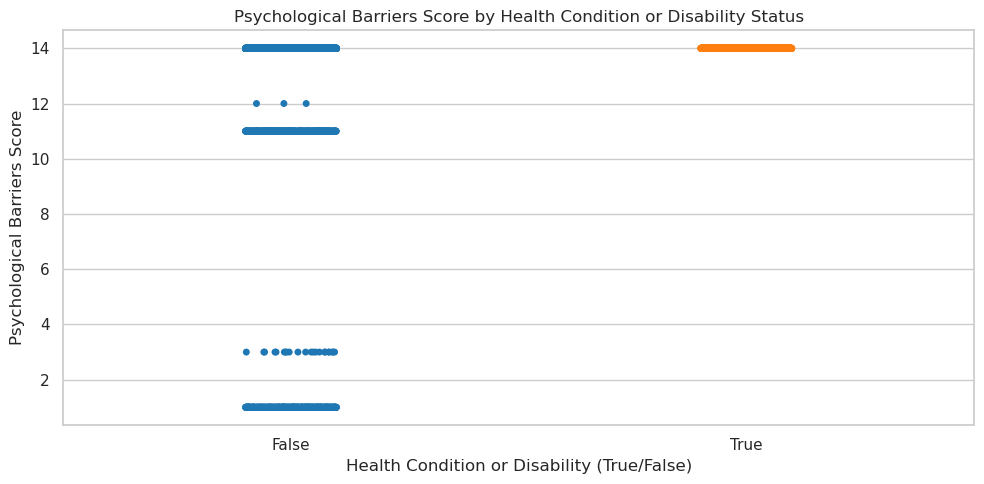

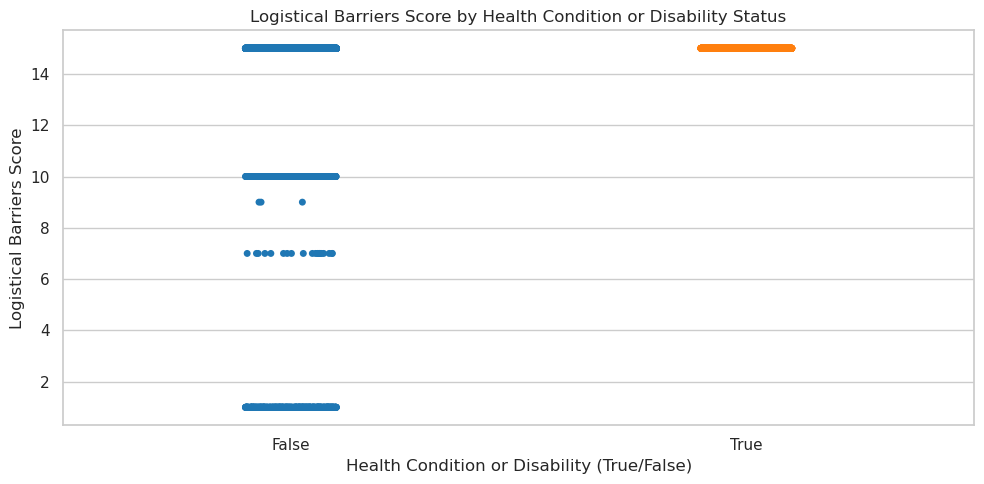

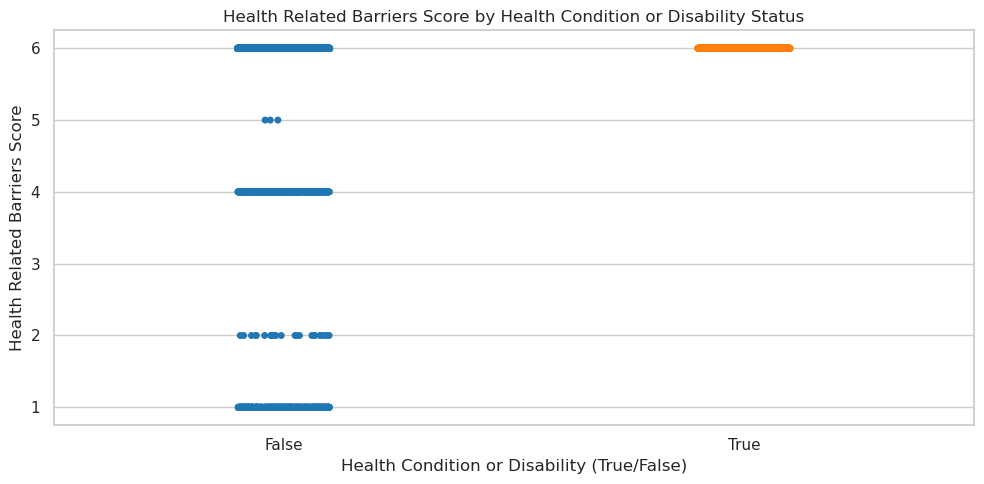

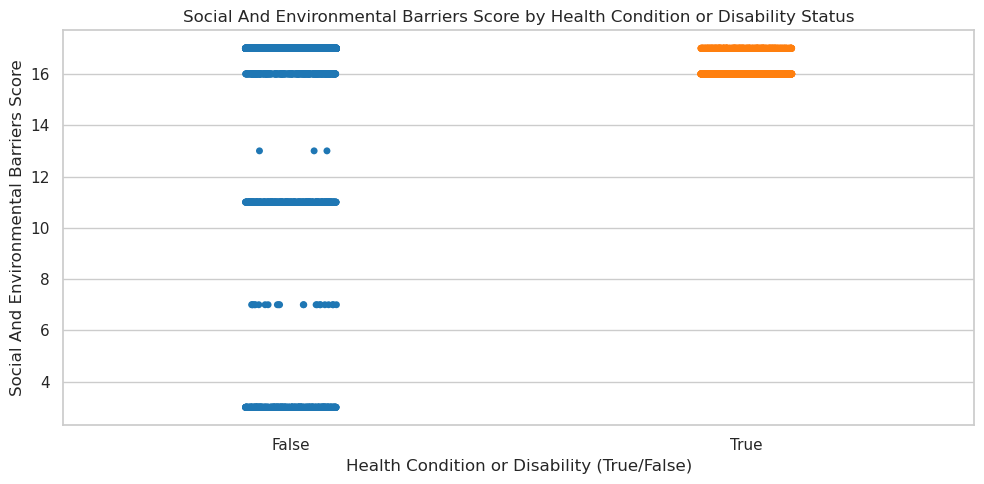

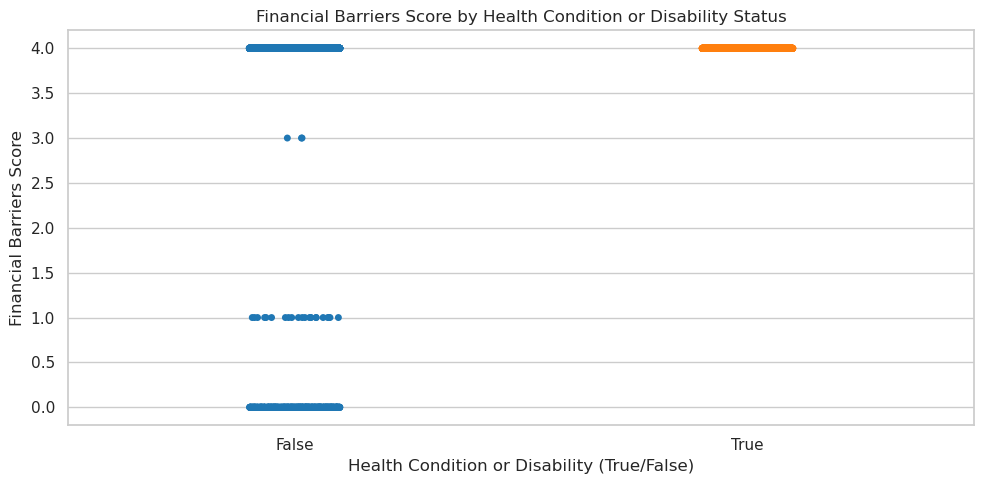

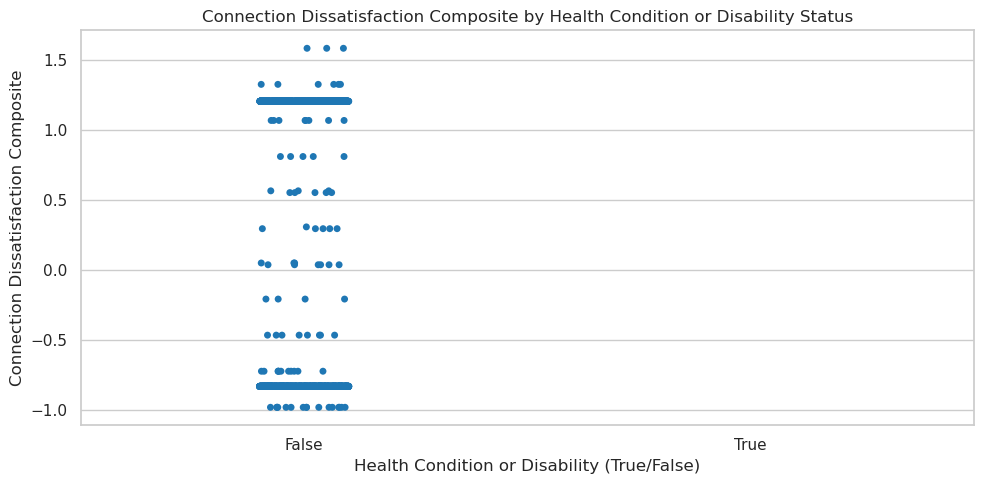

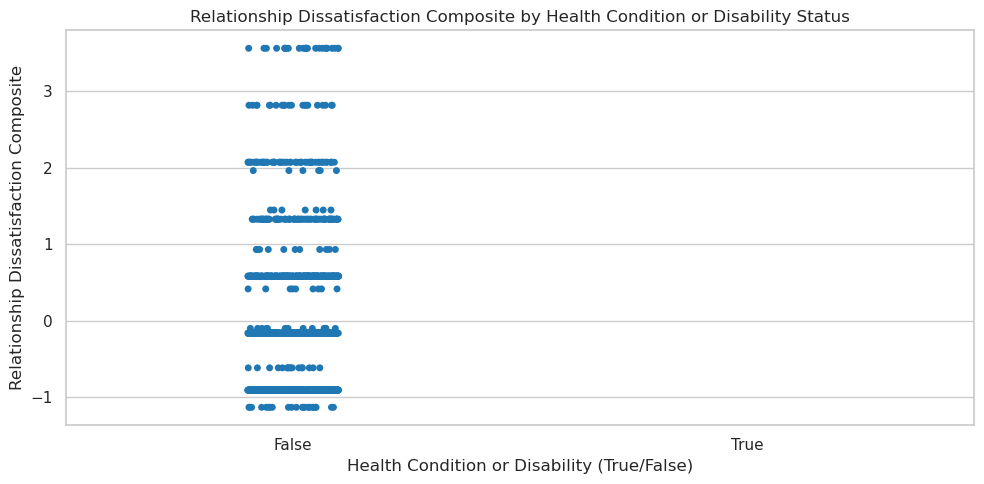

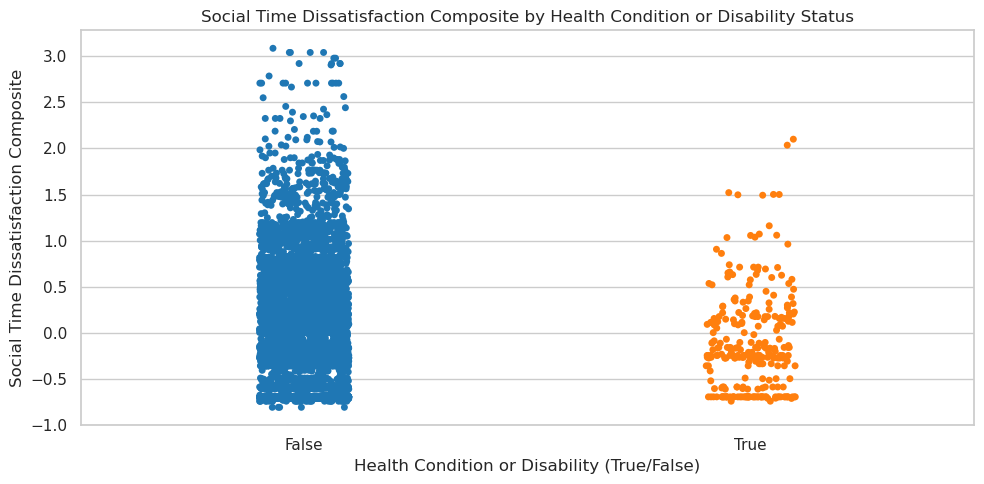

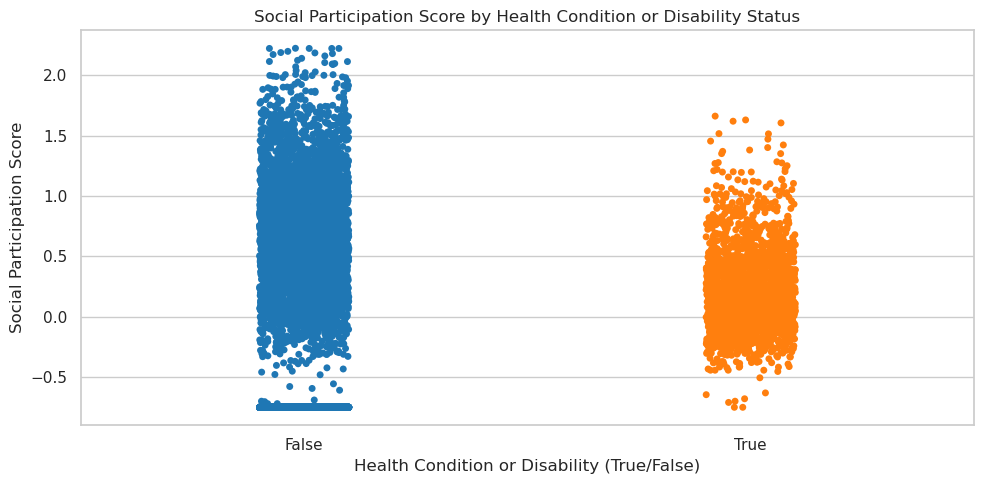

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables to compare
variables_to_compare = [
    'psychological_barriers_score', 'logistical_barriers_score', 
    'health_related_barriers_score', 'social_and_environmental_barriers_score', 
    'financial_barriers_score', 'Connection_Dissatisfaction_Composite', 
    'Relationship_Dissatisfaction_Composite', 'Social_Time_Dissatisfaction_Composite',
    'Social_Participation_Score'
]

# Create strip plots for each variable, comparing health status groups
for var in variables_to_compare:
    plt.figure(figsize=(10, 5))
    
    # Strip plot with health_condition_or_disability as the hue variable
    sns.stripplot(data=df, x='health_condition_or_disability', y=var, hue='health_condition_or_disability', 
                  jitter=True, palette=['#1f77b4', '#ff7f0e'], legend=False)
    
    # Set plot title and labels
    plt.title(f"{var.replace('_', ' ').title()} by Health Condition or Disability Status")
    plt.xlabel("Health Condition or Disability (True/False)")
    plt.ylabel(var.replace('_', ' ').title())
    
    # Show the plot
    plt.tight_layout()
    plt.show()

###### Dissatisfaction Score Variables and Barrier Score Variables: Scatter Plot Matrix

Visualization: Scatter plot matrix.

Reasoning: This matrix allows you to observe the pairwise relationships between scores where multiple variables were taken into account. For example, we can see if individuals who are dissatisfied in one area are likely to be dissatisfied in others. 

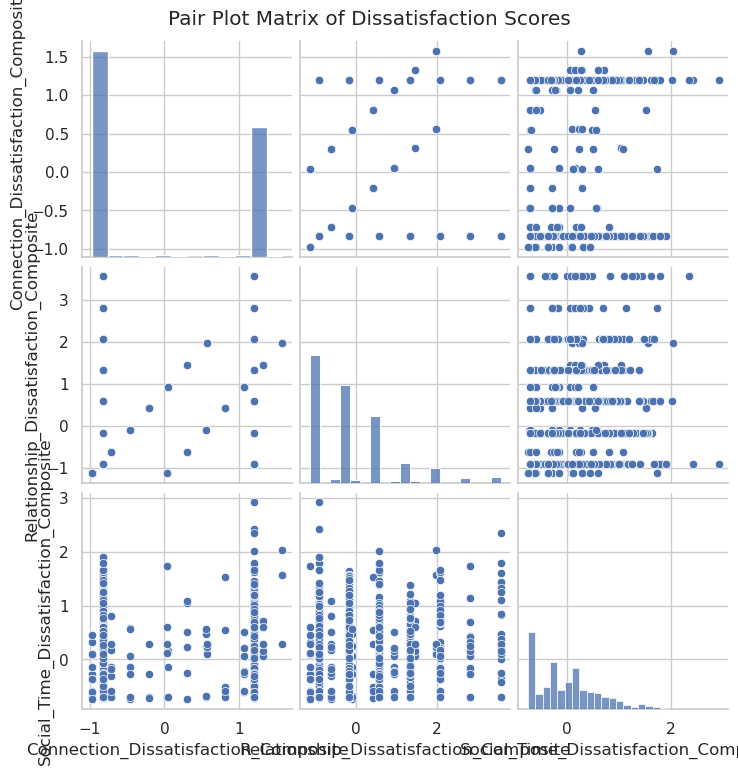

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of dissatisfaction scores
dissatisfaction_scores = [
    'Connection_Dissatisfaction_Composite',
    'Relationship_Dissatisfaction_Composite',
    'Social_Time_Dissatisfaction_Composite'
]

# Pair plot for dissatisfaction scores without health condition
sns.pairplot(df[dissatisfaction_scores].dropna())
plt.suptitle("Pair Plot Matrix of Dissatisfaction Scores", y=1.02)
plt.show()


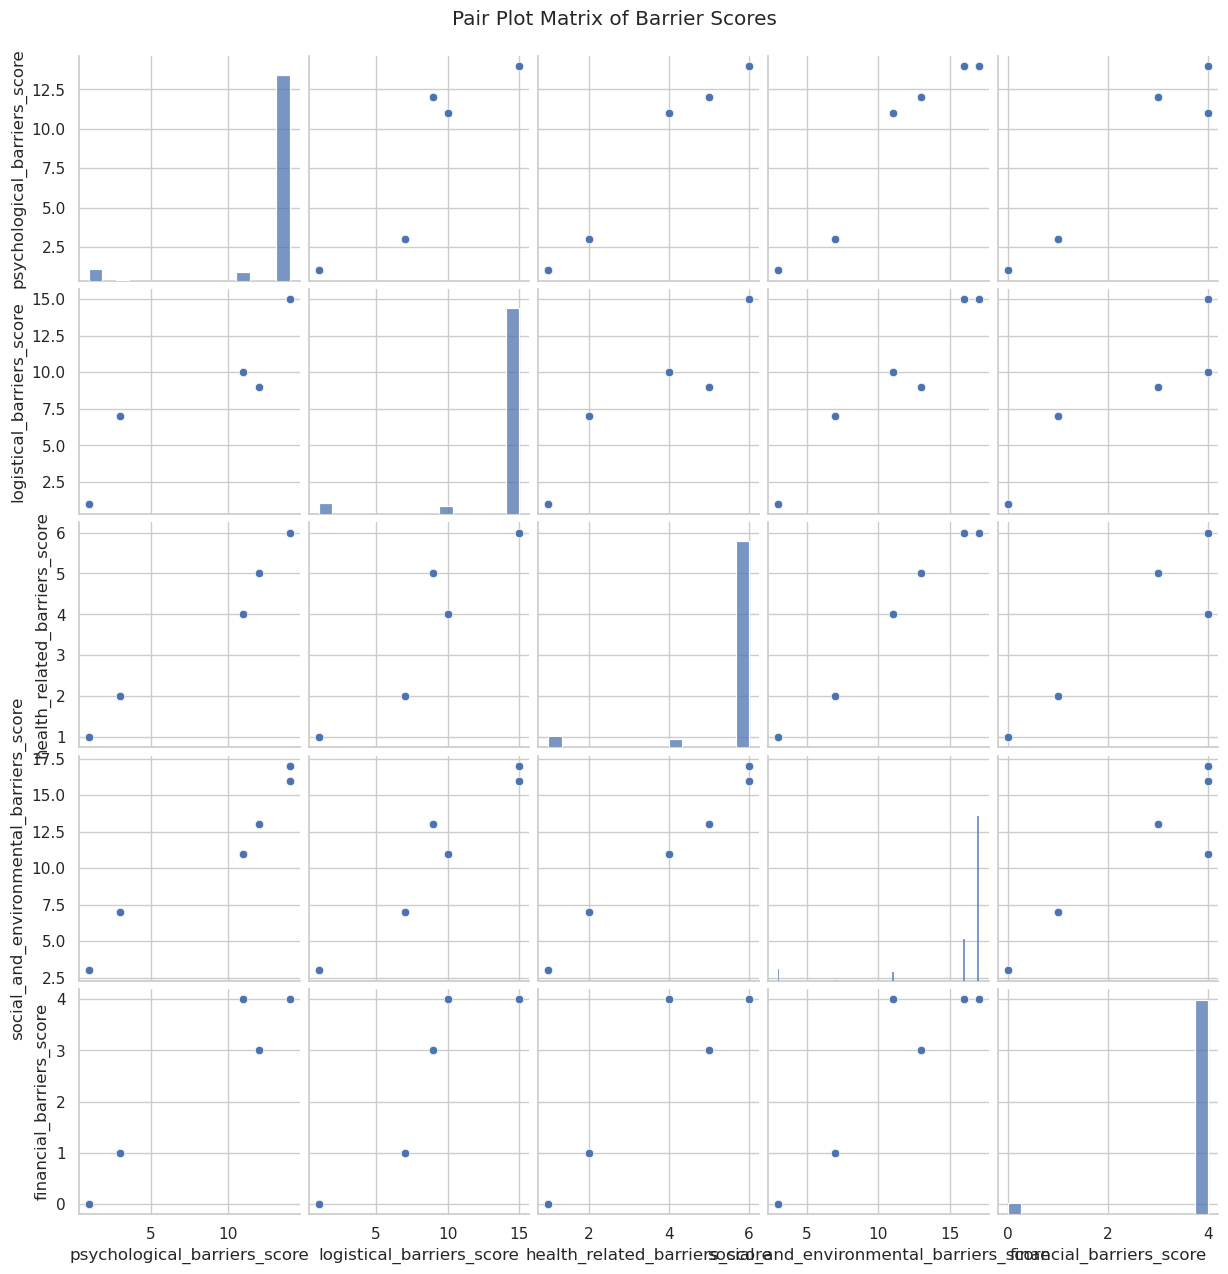

In [97]:
# List of barrier scores
barrier_scores = [
    'psychological_barriers_score', 'logistical_barriers_score', 
    'health_related_barriers_score', 'social_and_environmental_barriers_score', 
    'financial_barriers_score'
]

# Pair plot for barrier scores without health condition
sns.pairplot(df[barrier_scores].dropna())
plt.suptitle("Pair Plot Matrix of Barrier Scores", y=1.02)
plt.show()

## Establishing Hypotheses 

##### 3 Main Null Hypotheses

1. There is no significant association between perceived and existing barriers (psychological, logistical, health-related, social/environmental, financial) and social dissatisfaction levels, regardless of health condition or disability status.

2. There is no significant association between perceived and existing barriers (psychological, logistical, health-related, social/environmental, financial) and social participation levels, regardless of health condition or disability status.

3. There is no significant difference in social dissatisfaction and social participation levels between individuals with health conditions or disabilities and those without.

##### Null Hypotheses Relevance to RQ

The first hypothesis addresses possible association between barriers and dissatisfaction, the second addressed barriers and participation, and the final addresses differences between health statuses.

## Methodology For Each Null Analysis 

### (Before Touching the Nulls) Bootstrapping for Reliability of Composite Scores

**Goal**: To estimate the reliability of the composite scores and provide confidence intervals.

**Steps**:
- Bootstrap Resampling: Generate a large number of resampled datasets from the original data.
- Confidence Interval Calculation: For each resampled dataset, calculate the mean of each composite score (barriers, social dissatisfaction, and social participation). Use the results to determine 95% confidence intervals.

**Justification**: Ensure reliability and stability of composite across different resamples. Highlight any composite score that may lack consistency.

**Assumptions**: It is assumed that each observation in the original dataset is independent of others. 

**Possible Result**: Narrow confidence intervals suggest that these scores are reliable and stable across resampled datasets.

### Null Hypothesis 1 & 2 Analysis: Simple Linear Regression w/ p-Value

**Goal**: To assess the relationship between perceived and existing barriers and both social dissatisfaction and social participation.

**Nulls to Test**: 
No significant association between barriers and social dissatisfaction.
No significant association between barriers and social participation.

**Steps**:
- Independent Variable: Use each barrier score as an independent variable.
- Dependent Variables: Run separate regressions with Overall_Social_Dissatisfaction and Social_Participation_Score as dependent variables.
- p-value: For each predictor (e.g., psychological barriers), the p-value from regression indicates if the relationship between the barrier and the outcome is statistically significant. Low p-values (typically < 0.05) suggest that the relationship observed is unlikely to be due to random chance, providing evidence to reject the null hypothesis.

**Justification**: Quantify the relationship between barrier scores and the outcomes. 

**Assumptions**:  It is assumed that the relationship between each barrier score and the dependent variables (Overall Social Dissatisfaction and Social Participation Score) is approximately linear. 

**Possible Result**: When p-value below 0.05, there is statistically significant associations between the analyzed variables.

### Null Hypothesis 3 Analysis: t-Test or Mann-Whitney U Test for  Effect of Health Condition or Disability

**Goal**: To determine if there are significant differences in social dissatisfaction and social participation based on health condition/disability status.

**Null to Test**: 
There is no significant difference in social dissatisfaction and social participation between individuals with health conditions/disabilities and those without.

**Steps**:
- Independent Samples t-Test: Perform t-tests comparing Overall_Social_Dissatisfaction and Social_Participation_Score between the two groups (health_condition_or_disability = True and False).
- Non-Parametric Alternative: If the data is highly skewed or not normally distributed, use the Mann-Whitney U test as a non-parametric alternative to the t-test.

**Justification**: Using this t-test helps us understand if individuals with health conditions/disabilities experience significantly different levels of dissatisfaction or participation. The Mann-Whitney U test provides a backup for non-normal distributions.

**Assumption**:  It is assumed that the variances in social dissatisfaction and social participation are similar between the two groups (with and without health conditions/disabilities) when using the t-test.

**Possible Result**: Individuals with health conditions/disabilities showing significantly higher social dissatisfaction and lower social participation compared to those without, indicating differences based on health status.

##### After we learn it, perhaps Multivariable Linear Regression can be used to conduct a combined analysis of all 3 nulls.